## Image classification of MNIST dataset using CNN and Dropout

---

Dataset: [MNIST Dataset](http://yann.lecun.com/exdb/mnist/), Images of handwritten digits

---

## Importing Necessary libraries

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import random

## Importing MNIST dataset using TensorFlow

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

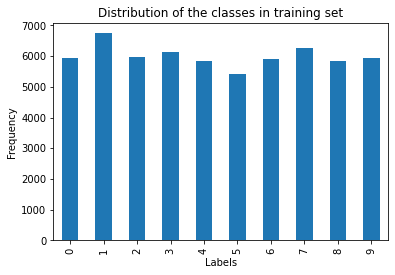

In [3]:
#checking distributions of the classes
pd.DataFrame(y_train, columns=['label']).label.value_counts().sort_index().plot(kind='bar')
plt.xlabel('Labels')
plt.ylabel('Frequency')
plt.title('Distribution of the classes in training set')
plt.show()

In [4]:
#checking for null values
np.isnan(x_train).any(), np.isnan(x_test).any(), np.isnan(y_train).any(), np.isnan(y_test).any()

(False, False, False, False)

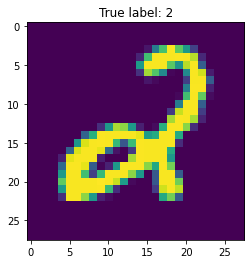

In [5]:
#Randon image and it's label
idx = random.randint(0, len(x_train))
plt.imshow(x_train[idx]), 
plt.title("True label: " + str(y_train[idx]))
plt.show()

## Normalizing and reshaping the images & Applying one-hot Encoding for labels

1.   Conv2D layer takes 4 dimensional tensor so instead of 60000 28x28x1 tensors it takes a 60000x28x28x1 tensor
2.   Dividing by 255 to normalize because the pixel value ranges from 0 to 255 this will result in the values being in 0 to 1 range

In [6]:
x_train=x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_train=x_train / 255.0
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)
x_test=x_test/255.0

In [7]:
#preparing labels using one hot encoding for classification
num_classes = len(np.unique(y_train))
y_train = tf.one_hot(y_train.astype(np.int32), depth=num_classes)
y_test = tf.one_hot(y_test.astype(np.int32), depth=num_classes)

## Creating & Compiling the Sequential Model



1.   MaxPooling in order to reduce the computation and increase training speed
2.   Dropouts in order to prevent overfitting of training data



In [8]:
batch_size = 64 
epochs = 5
input_shape = x_train.shape[1:] 

In [9]:
#Model creation
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (5,5), padding='same', activation='relu', input_shape=input_shape),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Conv2D(32, (5,5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        12832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1568)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [11]:
#Compiling model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=5e-4), loss='categorical_crossentropy', metrics=['acc'])

## Training & Evaluating the model using confusion matrix

In [12]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.2,
                    callbacks=[callback])

Epoch 1/5
750/750 [==============================] - 71s 93ms/step - loss: 0.2856 - acc: 0.9159 - val_loss: 0.0762 - val_acc: 0.9762
Epoch 2/5
750/750 [==============================] - 58s 78ms/step - loss: 0.0809 - acc: 0.9754 - val_loss: 0.0535 - val_acc: 0.9838
Epoch 3/5
750/750 [==============================] - 59s 78ms/step - loss: 0.0589 - acc: 0.9821 - val_loss: 0.0502 - val_acc: 0.9836
Epoch 4/5
750/750 [==============================] - 58s 77ms/step - loss: 0.0459 - acc: 0.9853 - val_loss: 0.0401 - val_acc: 0.9871
Epoch 5/5
750/750 [==============================] - 58s 77ms/step - loss: 0.0370 - acc: 0.9887 - val_loss: 0.0370 - val_acc: 0.9889


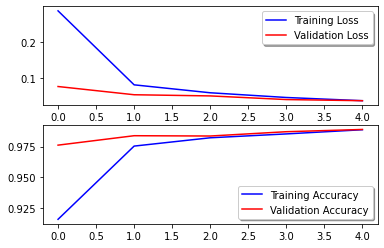

In [13]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training Loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation Loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training Accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation Accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [14]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.0298 - acc: 0.9894


[0.029779337346553802, 0.9894000291824341]

In [15]:
# Confusion Matrix
predictions = model.predict(x_test)
prediction_classes = np.argmax(predictions,axis = 1) 
true_classes = np.argmax(y_test,axis = 1)

313/313 [==============================] - 4s 12ms/step


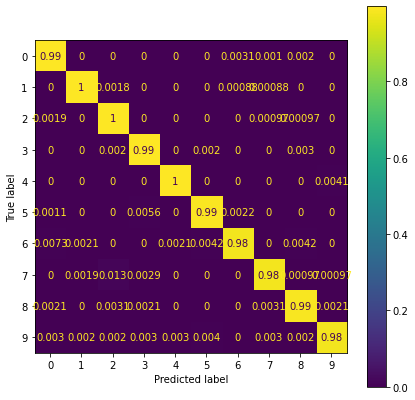

In [16]:
# plot confusion_matrix
cm = confusion_matrix(true_classes, prediction_classes, normalize='true')
disp = ConfusionMatrixDisplay(cm, display_labels= list(set(true_classes)))
disp.plot()
fig = disp.ax_.get_figure()
fig.set_figwidth(7)
fig.set_figheight(7) 
plt.show()